<a href="https://colab.research.google.com/github/charan76/Twitter-user-gender-prediction/blob/main/simpli1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WALLMART DATA ANALYSIS AND PREDICTION**

first import all the packages which are required 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression



reading csv file 

In [ ]:
df = pd.read_csv('/content/Walmart_Store_sales.csv')

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df.head()
# it shows first records 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.info()
# here it shows all columns with their data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.describe(include='all')
# here data columns are not in the data type and all the columns are of numerical types

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,09-07-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


In [ ]:
df.isnull().sum()
#here it shows there are no missing values in the data sets

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

creating two new columns year and month form date column

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5


**Analysis**


1.which store has maximum sales?

In [ ]:
df.groupby('Store')['Weekly_Sales'].max().sort_values(ascending = False).head()

Store
14    3818686.45
20    3766687.43
10    3749057.69
4     3676388.98
13    3595903.20
Name: Weekly_Sales, dtype: float64

here Store 14 has maximum sales 

2. which store has maximum variations in weekly sales?
      

In [ ]:
std_devs = []
total_stores = df['Store'].nunique()
for store in range(1, int(total_stores)+1):
    values = df[df['Store'] == store]['Weekly_Sales'].values
    sd = np.std(values)
    std_devs.append(sd)

max_std_dev = max(std_devs)
print("stores with maximum standard deviation : Store", std_devs.index(max_std_dev)+1)

stores with maximum standard deviation : Store 14


3. which store has good quaterly growth rate in Q3'2012?

In [ ]:
qtr_profits = []
for store in range(1, int(total_stores)+1):
    values = df[(df['Store'] == store) & (df['Date'] > '2012-06-01') & (df['Date'] < '2012-09-01')]['Weekly_Sales'].values
    qtr_profits.append(np.mean(values))

print("Store with maximum profit in Q3'2012",qtr_profits.index(max(qtr_profits))+1)

Store with maximum profit in Q3'2012 4


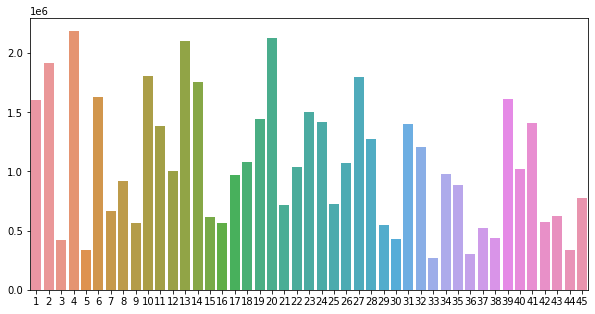

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = [store for store in range(1,int(total_stores)+1)] , y = qtr_profits)
plt.show()

find out holidays which have higher sales than the mean sales in non holiday season for all stores together 

In [ ]:
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
df_v1 = pd.DataFrame(df[df['Holiday_Flag'] == 1].groupby('Date')['Weekly_Sales'].mean())
print(df_v1[df_v1['Weekly_Sales'] > non_holiday_sales])

            Weekly_Sales
Date                    
2010-11-26  1.462689e+06
2010-12-02  1.074148e+06
2011-11-02  1.051915e+06
2011-11-25  1.479858e+06
2012-07-09  1.074001e+06
2012-10-02  1.111320e+06


In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5


which year has maximum weekly_sales

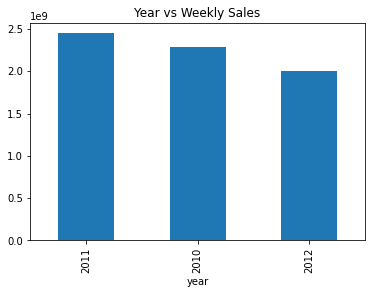

In [ ]:
df.groupby(['year'])['Weekly_Sales'].sum().sort_values(ascending = False).plot.bar(x = "Year", y = "Weekly Sales", title = "Year vs Weekly Sales")

sales are higher when compare to 2010 and 2012

which store has highest sales in holiday


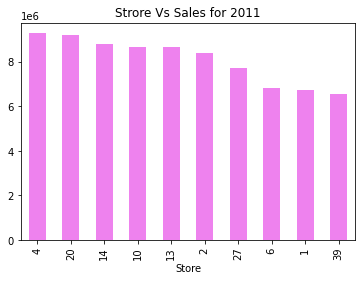

In [ ]:
df_v1 = df[(df['Holiday_Flag'] == 1) & (df['year'] == 2011)]
df_v1.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False).head(10).plot.bar(color = 'violet', title = "Strore Vs Sales for 2011")

store 4 has highest weekly sales in the year 2011

**CORRELATION**

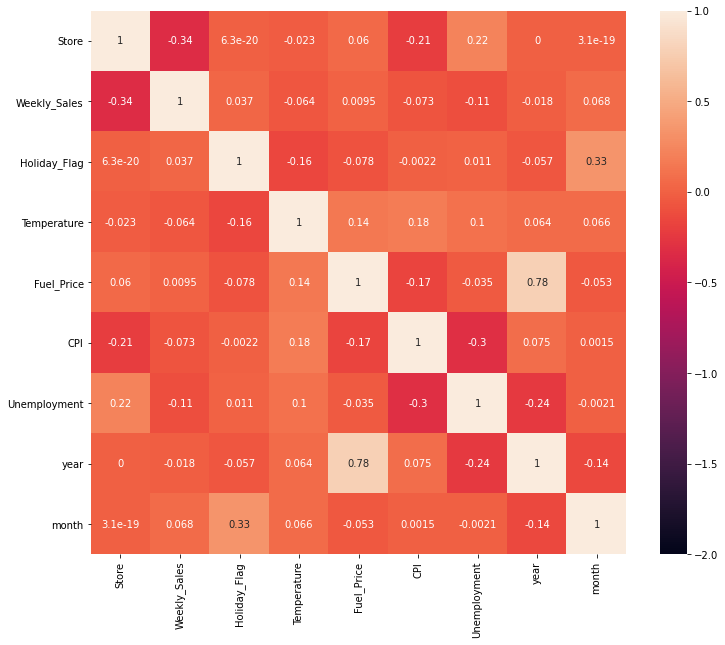

In [ ]:
corr = df.corr()

plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, vmin = -2.0)
plt.show()

Predecting weekly sales for all the stores 

In [ ]:
df['Day'] = df['Date'].dt.day
df = df.drop('Date', axis=1)

In [ ]:
df_v2 = pd.get_dummies(df, columns = ['Holiday_Flag', 'Store'])
Y = df_v2['Weekly_Sales']
X = df_v2.drop('Weekly_Sales', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
ln_model = LinearRegression()
ln_model.fit(X_train,y_train)
y_pred = ln_model.predict(X_test)
print("r2 score:",r2_score(y_test,y_pred))

r2 score: 0.9231435482575953


Predicting wheather the given sales record belongs to holidays or not

splitting independent and dependent variables

In [ ]:
y = df['Holiday_Flag']
X = df.drop('Holiday_Flag', axis = 1)

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7)

In [ ]:
penalty = ["l1", "l2"]
c = np.logspace(0,8,10)
hyperparameters = dict(C = c, penalty = penalty, solver = ['liblinear']) 

In [ ]:
model = LogisticRegression()
clf = GridSearchCV(model,hyperparameters, cv = 10, verbose= 0)
best_model = clf.fit(X_train, y_train)
print("best hyperparameters : ", best_model.best_params_)

best hyperparameters :  {'C': 7.742636826811269, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
y_pred = best_model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
print(best_model.score(X_test, y_test))

0.9357845675815639


In [ ]:
confusion_matrix = confusion_matrix(y_pred, y_test)
print(confusion_matrix)

[[1799  114]
 [  10    8]]
